# Table of Contents

1. [Querying for Specialized Verb Forms](#Querying-for-Specialized-Verb-Forms)
    * [Subjunctive + ἄν](#Subjunctive-+-ἄν)
    
2. [Sentence Alignment](#Sentence-Alignment)
    * [Alignment Functions](#Alignment-Functions)
    * [Sentence Alignment for Subjunctive + ἄν](#Sentence-Alignment-for-Subjunctive-+-ἄν)
    * [Iliad/Odyssey Vocab Alignment](#Iliad/Odyssey-Vocab-Alignment)
    
3. [Adjacency List & Network Creation](#Adjacency-List-&-Network-Creation)
    * [Preposition Modified Verbs](#Preposition-Modified-Verbs)
    * [Prepositions with Accusative Objects](#Prepositions-with-Accusative-Objects)
    * [Preposition Relation Network](#Preposition-Relation-Network)

In [1]:
# change to local machine path
LOCALROOT = '/Users/bellahwang/Documents/GitHub/'

## Querying for Specialized Verb Forms

### Subjunctive + ἄν

This script uses the ElementTree package to parse the xml of Homer's 'Odyssey' and to produce the number of ἄν modified subjunctives and to print them out.

I've made the script interactive so that the program can search through either the Iliad or the Odyssey, and the script will return a numbered list of all ἄν modified subjunctives in the selected work. 

This program was part of my early work in developing a general framework to examine relationships between words in the Ancient Greek Dependency Treebank. I have modified the code slightly so that it's easier to experiment with plugging in different words/grammatical concepts - both `MODLEMMA` and `TARGMOOD` can be changed as needed. 

Currently, `MODLEMMA` (modifier lemma) is set to "ἄν" and `TARGMOOD` (target mood) is set to "subjunctive."

Sample Output:

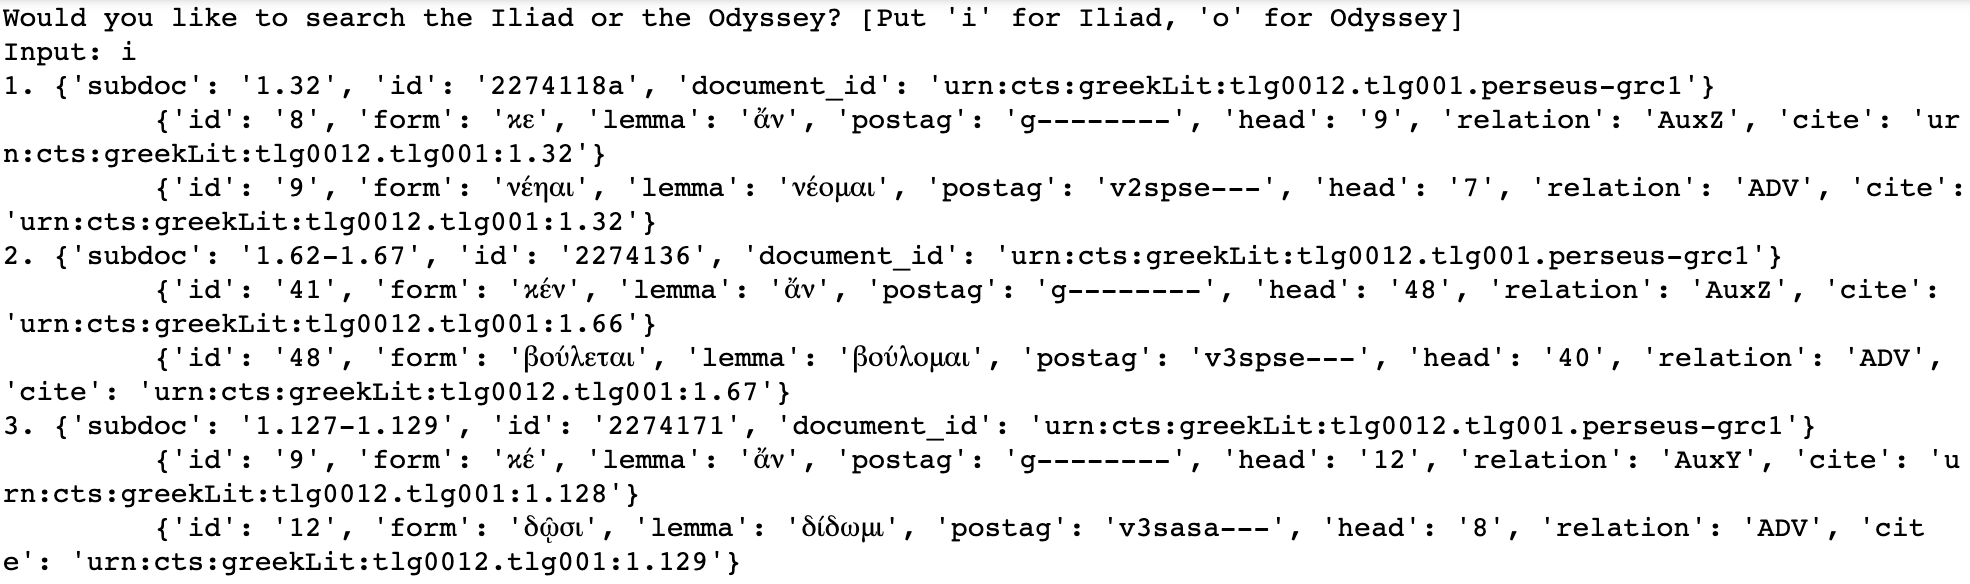

In [86]:
import xml.etree.ElementTree as ET
import os

ILIAD      = "tlg0012.tlg001.perseus-grc1.tb.xml"
ODYSSEY    = "tlg0012.tlg002.perseus-grc1.tb.xml"

print("Would you like to search the Iliad or the Odyssey? [Put 'i' for Iliad, 'o' for Odyssey]")

FILENAME = ''
while (FILENAME == ''):
    work = input("Input: ")
    if (work == 'i' or work == 'I' or work == '1' or work == 'Il' or work == 'Iliad'):
        FILENAME = ILIAD
        il_od = 'i'
    elif (work == 'o' or work == 'O' or work == '2' or work == 'Od' or work == "Odyssey"):
        FILENAME = ODYSSEY
        il_od = 'o'
    else:
        print("Your input cannot be recognized! Try ['i' for Iliad or 'o' for Odyssey].")

LOCALPATH  = os.path.join(LOCALROOT, 'gAGDT', 'data', 'xml', FILENAME)
tree = ET.parse(LOCALPATH)
root = tree.getroot()

count   = 1    #sets counter keeping track of query results
targid  = -10  #in case the code encounters a subjunctive first
modhead = -20  #in case the code encounters an ἄν first

moods   = {'indicative':'i','subjunctive':'s', 'optative':'o','imperative':'m','participle':'p',
           'infinitive':'n', 'verbal_adjective':'g','uncertain':'x'}

# change these variables to test out different moods and modifiers
MODLEMMA = 'ἄν'
TARGMOOD = 'subjunctive'

for sentence in root.findall('.//sentence'):
    for word in sentence.findall('./word'):
        if 'postag' in word.attrib:
            postag = word.get('postag')
            mood   = postag[4] #narrows down to verb mood
            lemma  = word.get('lemma')
            if lemma == MODLEMMA:
                modhead = word.get('head')
                modword = word.attrib
            elif mood == moods[TARGMOOD]: 
                targid = word.get('id')
                targword = word.attrib
                if modhead == targid: #checks if ἄν modifies subjunctive
                    print(str(count) + '.', sentence.attrib)
                    print('\t', modword)
                    print('\t', targword)

                    count += 1
    targid = -10  
    modhead = -20

Would you like to search the Iliad or the Odyssey? [Put 'i' for Iliad, 'o' for Odyssey]
Input: i
1. {'subdoc': '1.32', 'id': '2274118a', 'document_id': 'urn:cts:greekLit:tlg0012.tlg001.perseus-grc1'}
	 {'id': '8', 'form': 'κε', 'lemma': 'ἄν', 'postag': 'g--------', 'head': '9', 'relation': 'AuxZ', 'cite': 'urn:cts:greekLit:tlg0012.tlg001:1.32'}
	 {'id': '9', 'form': 'νέηαι', 'lemma': 'νέομαι', 'postag': 'v2spse---', 'head': '7', 'relation': 'ADV', 'cite': 'urn:cts:greekLit:tlg0012.tlg001:1.32'}
2. {'subdoc': '1.62-1.67', 'id': '2274136', 'document_id': 'urn:cts:greekLit:tlg0012.tlg001.perseus-grc1'}
	 {'id': '41', 'form': 'κέν', 'lemma': 'ἄν', 'postag': 'g--------', 'head': '48', 'relation': 'AuxZ', 'cite': 'urn:cts:greekLit:tlg0012.tlg001:1.66'}
	 {'id': '48', 'form': 'βούλεται', 'lemma': 'βούλομαι', 'postag': 'v3spse---', 'head': '40', 'relation': 'ADV', 'cite': 'urn:cts:greekLit:tlg0012.tlg001:1.67'}
3. {'subdoc': '1.127-1.129', 'id': '2274171', 'document_id': 'urn:cts:greekLit:tlg0

## Sentence Alignment

### Alignment Functions

Below are the functions `printEngSent`, `printGrkSent`, and `printGrkSent2`, which are used to align Ancient Greek sentences to English sentences. 
* `printEngSent` looks at A.T. Murray's English translations of the Iliad and the Odyssey and print these aligned English sentences underneath the actual Greek.
* `printGrkSent` and `printGrkSent2` both look at the Greek and print the Greek sentences above the aligned English translations. Given information about specific words in the sentences, these functions print out Greek sentences with highlighted forms. 
    * `printGrkSent` returns a sentence with one highlighted form (useful for finding examples of vocabulary words)
    * `printGrkSent2` returns a sentence with two highlighted forms (useful for finding examples of a relationship between two words)
    
The reason why I rewrote `printEngSent` with `BeautifulSoup` is because `ElementTree` doesn't take well to embeddings within the text - it essentially stops printing any text as soon as another tag is found. This bug was causing incomplete English sentences to be printed, so I used `BeautifulSoup`, which does not have this issue when printing the text inside tags.

In [58]:
from bs4 import BeautifulSoup
import sys
import os

ILIAD_ENG     = os.path.join(LOCALROOT, 'Homerica', "atmurray.iliad-sentalign-mod.xml")
ODYSSEY_ENG   = os.path.join(LOCALROOT, 'Homerica', "atmurray.odyssey-sentalign-mod.xml")

with open(ILIAD_ENG, 'r', encoding="utf-8") as f:
    ILIAD = f.read()
    ILIAD_SOUP = BeautifulSoup(ILIAD, "xml")
with open(ODYSSEY_ENG, 'r', encoding="utf-8") as f:
    ODYSSEY = f.read()
    ODYSSEY_SOUP = BeautifulSoup(ODYSSEY, "xml")
    
def printEngSent(il_od, target):
    if (il_od == 'i'):
        for sentence in ILIAD_SOUP('s'):
            if sentence.has_attr('xml:id'):
                sentID = sentence['xml:id']
                if (target == sentID[4:11]):
                    sys.stdout.write(sentence.text)
    elif (il_od == 'o'):
        for sentence in ODYSSEY_SOUP('s'):
            if sentence.has_attr('xml:id'):
                sentID = sentence['xml:id']
                if (target == sentID[4:11]):
                    sys.stdout.write(sentence.text)

In [59]:
import xml.etree.ElementTree as ET

ILPATH = os.path.join(LOCALROOT, 'gAGDT', 'data', 'xml', "tlg0012.tlg001.perseus-grc1.tb.xml")
IlTree = ET.parse(ILPATH)
IlRoot = IlTree.getroot()

ODPATH = os.path.join(LOCALROOT, 'gAGDT', 'data', 'xml', "tlg0012.tlg002.perseus-grc1.tb.xml")
OdTree = ET.parse(ODPATH)
OdRoot = OdTree.getroot()

def printGrkSent(il_od, targetid, givenid):
    if (il_od == 'i'):
        Grkroot = IlRoot
    else:
        Grkroot = OdRoot
    for sentence in Grkroot.findall('.//sentence'): 
        sentid = sentence.get('id')
        if (sentid == targetid):
            for word in sentence.findall('./word'):
                wordid = word.get('id')
                form = word.get('form')
                lemma = word.get('lemma')
                postag = word.get('postag')
                if (postag != None):
                    if (wordid == givenid):

                        # comment out if converting to html
                                        #  bold        green               end
                        sys.stdout.write('\033[1m' + '\33[32m' + form + '\033[0m')
                        sys.stdout.write(" ")

                        # for html file conversion
                        '''
                        sys.stdout.write('' + form + '')
                        sys.stdout.write(" ")
                        '''

                        continue
                    sys.stdout.write(form)
                    sys.stdout.write(" ")

def printGrkSent2(il_od, targetid, firstid, secondid):
    if (il_od == 'i'):
        Grkroot = IlRoot
    else:
        Grkroot = OdRoot
    for sentence in Grkroot.findall('.//sentence'): 
        sentid = sentence.get('id')
        if (sentid == targetid):
            for word in sentence.findall('./word'):
                wordid = word.get('id')
                form = word.get('form')
                lemma = word.get('lemma')
                postag = word.get('postag')
                if (postag != None):
                    if (wordid == firstid or wordid == secondid):

                        # comment out if converting to html
                                        #  bold        green               end
                        sys.stdout.write('\033[1m' + '\33[32m' + form + '\033[0m')
                        sys.stdout.write(" ")

                        # for html file conversion
                        '''
                        sys.stdout.write('' + form + '')
                        sys.stdout.write(" ")
                        '''
                        
                        continue
                    sys.stdout.write(form)
                    sys.stdout.write(" ")

### Sentence Alignment for Subjunctive + ἄν

I've applied these sentence alignment functions to the earlier script examining ἄν modified subjunctives, and this output shows how `printGrkSent2` is able to highlight both the ἄν and the subjunctive being modified by it. 

This script also accounts for subjunctives that are not modified by ἄν and provides:
* a total count for ἄν modified subjunctives
* a total count for subjunctives NOT modified by ἄν
* a total count for all subjunctives

I also wrote some code that is currently commented out, but when uncommented, it becomes possible to export these alignments into HTML tables for easy conversions into other mediums (for example, importing alignments into Excel or Sheets).

Both `MODLEMMA` and `TARGMOOD` can be changed as needed. 

Currently, `MODLEMMA` (modifier lemma) is set to "ἄν" and `TARGMOOD` (target mood) is set to "subjunctive."

Sample Output:

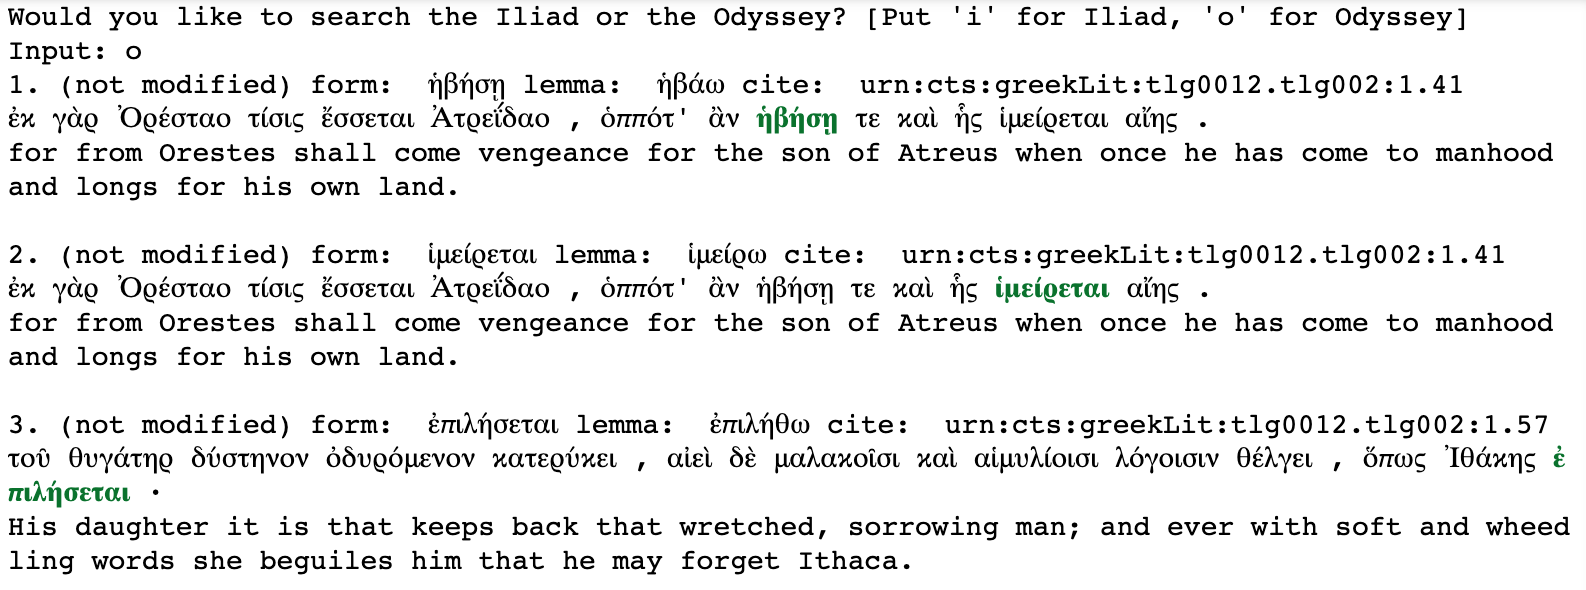

In [94]:
ILIAD      = "tlg0012.tlg001.perseus-grc1.tb.xml"
ODYSSEY    = "tlg0012.tlg002.perseus-grc1.tb.xml"

print("Would you like to search the Iliad or the Odyssey? [Put 'i' for Iliad, 'o' for Odyssey]")

FILENAME = ''
while (FILENAME == ''):
    work = input("Input: ")
    if (work == 'i' or work == 'I' or work == '1' or work == 'Il' or work == 'Iliad'):
        FILENAME = ILIAD
        il_od = 'i'
    elif (work == 'o' or work == 'O' or work == '2' or work == 'Od' or work == "Odyssey"):
        FILENAME = ODYSSEY
        il_od = 'o'
    else:
        print("Your input cannot be recognized! Try ['i' for Iliad or 'o' for Odyssey].")

LOCALPATH  = os.path.join(LOCALROOT, 'gAGDT', 'data', 'xml', FILENAME)
tree = ET.parse(LOCALPATH)
root = tree.getroot()

totalCount  = 1
modCount    = 1
unmodCount  = 1

targid  = -10       # in case the code encounters a subjunctive first
modhead = -20       # in case the code encounters an ἄν first
modid   = -30

moods   = {'indicative':'i','subjunctive':'s', 'optative':'o','imperative':'m','participle':'p',
           'infinitive':'n', 'verbal_adjective':'g','uncertain':'x'}

# change these variables to test out different moods and modifiers
MODLEMMA = 'ἄν'
TARGMOOD = 'subjunctive'

# for html file conversion
# sys.stdout.write("<table>" + "\n")

for sentence in root.findall('.//sentence'):
    sentid = sentence.get('id')
    for word in sentence.findall('./word'):
        if 'postag' in word.attrib:
            postag = word.get('postag')
            mood = postag[4]
            form = word.get('form')
            cite = word.get('cite')
            lemma = word.get('lemma')
            if lemma == MODLEMMA:
                modhead = word.get('head')
                modid = word.get('id')
            else:
                targid = word.get('id')
                if (mood == moods[TARGMOOD]):
                    # moods that ARE modified
                    if modhead == targid: 

                        # comment out if converting to html
                        #'''
                        print(str(modCount) + '.', "(modified)", \
                              "form: ", form, "lemma: ", lemma, "cite: ", cite)
                        printGrkSent2(il_od, sentid, targid, modid)
                        print('')
                        printEngSent(il_od, sentid)
                        print('')
                        print('')
                        totalCount += 1
                        modCount   += 1
                        
                        targid  = -10  
                        modhead = -20
                        modid   = -30
                        #'''
                        
                        # for html file conversion
                        '''
                        sys.stdout.write("\t" + "<tr>" + "\n")
                        sys.stdout.write("\t" + "\t" + "<td>" + form + "</td>" + "\n")
                        sys.stdout.write("\t" + "\t" + "<td>" + lemma + "</td>" + "\n")
                        sys.stdout.write("\t" + "\t" + "<td>" + cite + "</td>" + "\n")
                        sys.stdout.write("\t" + "\t" + "<td>")
                        printGrkSent2(il_od, sentid, targid, modid)
                        sys.stdout.write("</td>" + "\n")
                        sys.stdout.write("\t" + "\t" + "<td>")
                        printEngSent(il_od, sentid)
                        sys.stdout.write("\t" + "\t" + "</td>" + "\n")
                        sys.stdout.write("\t" + "</tr>" + "\n")
                        '''
                    
                    # moods that are NOT modified
                    
                    else:

                        # comment out if converting to html
                        print(str(totalCount) + ".", "(not modified)", \
                              "form: ", form, "lemma: ", lemma, "cite: ", cite)
                        printGrkSent(il_od, sentid, targid)
                        print('')
                        printEngSent(il_od, sentid)
                        print('')
                        print('')

                        totalCount   += 1
                        unmodCount   += 1
                        
                        #targid  = -10  
                        #modhead = -20
                        #modid   = -30
                        
                        # for html file conversion
                        '''
                        sys.stdout.write("\t" + "<tr>" + "\n")
                        sys.stdout.write("\t" + "\t" + "<td>" + form + "</td>" + "\n")
                        sys.stdout.write("\t" + "\t" + "<td>" + lemma + "</td>" + "\n")
                        sys.stdout.write("\t" + "\t" + "<td>" + cite + "</td>" + "\n")
                        sys.stdout.write("\t" + "\t" + "<td>")
                        printGrkSent(il_od, sentid, targid)
                        sys.stdout.write("</td>" + "\n")
                        sys.stdout.write("\t" + "\t" + "<td>")
                        printEngSent(il_od, sentid)
                        sys.stdout.write("\t" + "\t" + "</td>" + "\n")
                        sys.stdout.write("\t" + "</tr>" + "\n")
                        '''
    targid  = -10  
    modhead = -20
    modid   = -30
print('Total Modified Moods: ', modCount - 1)
print('Total Moods Without Modification: ', unmodCount - 1)
print('Total Moods: ', totalCount - 2)

# for html file conversion
# sys.stdout.write("</table>")

Would you like to search the Iliad or the Odyssey? [Put 'i' for Iliad, 'o' for Odyssey]
Input: o
1. (not modified) form:  ἡβήσῃ lemma:  ἡβάω cite:  urn:cts:greekLit:tlg0012.tlg002:1.41
ἐκ γὰρ Ὀρέσταο τίσις ἔσσεται Ἀτρεΐδαο , ὁππότ' ἂν ἡβήσῃ τε καὶ ἧς ἱμείρεται αἴης . 
for from Orestes shall come vengeance for the son of Atreus when once he has come to manhood and longs for his own land.

2. (not modified) form:  ἱμείρεται lemma:  ἱμείρω cite:  urn:cts:greekLit:tlg0012.tlg002:1.41
ἐκ γὰρ Ὀρέσταο τίσις ἔσσεται Ἀτρεΐδαο , ὁππότ' ἂν ἡβήσῃ τε καὶ ἧς ἱμείρεται αἴης . 
for from Orestes shall come vengeance for the son of Atreus when once he has come to manhood and longs for his own land.

3. (not modified) form:  ἐπιλήσεται lemma:  ἐπιλήθω cite:  urn:cts:greekLit:tlg0012.tlg002:1.57
τοῦ θυγάτηρ δύστηνον ὀδυρόμενον κατερύκει , αἰεὶ δὲ μαλακοῖσι καὶ αἱμυλίοισι λόγοισιν θέλγει , ὅπως Ἰθάκης ἐπιλήσεται · 
His daughter it is that keeps back that wretched, sorrowing man; and ever with soft and whee

νῆ' ἄρσας ἐρέτῃσιν ἐείκοσιν , ἥ τις ἀρίστη , ἔρχεο πευσόμενος πατρὸς δὴν οἰχομένοιο , ἤν τίς τοι εἴπῃσι βροτῶν , ἢ ὄσσαν ἀκούσῃς ἐκ Διός , ἥ τε μάλιστα φέρει κλέος ἀνθρώποισι . 
Man with twenty rowers the best ship you have, and go to seek tidings of your father, that has long been gone, if by chance any mortal may tell you, or you may hear a voice from Zeus, which oftenest brings tidings to men.

22. (not modified) form:  ἀκούσῃς lemma:  ἀκούω cite:  urn:cts:greekLit:tlg0012.tlg002:1.282
νῆ' ἄρσας ἐρέτῃσιν ἐείκοσιν , ἥ τις ἀρίστη , ἔρχεο πευσόμενος πατρὸς δὴν οἰχομένοιο , ἤν τίς τοι εἴπῃσι βροτῶν , ἢ ὄσσαν ἀκούσῃς ἐκ Διός , ἥ τε μάλιστα φέρει κλέος ἀνθρώποισι . 
Man with twenty rowers the best ship you have, and go to seek tidings of your father, that has long been gone, if by chance any mortal may tell you, or you may hear a voice from Zeus, which oftenest brings tidings to men.

6. (modified) form:  ἀκούσῃς lemma:  ἀκούω cite:  urn:cts:greekLit:tlg0012.tlg002:1.287
εἰ μέν κεν πατρὸς

And in my hollow ship he bound it fast with a bright cord of silver, that not a breath might escape, were it never so slight.

42. (not modified) form:  ἵκηται lemma:  ἱκνέομαι cite:  urn:cts:greekLit:tlg0012.tlg002:10.39
" ὦ πόποι , ὡς ὅδε πᾶσι φίλος καὶ τίμιός ἐστιν ἀνθρώποις , ὅτεών τε πόλιν καὶ γαῖαν ἵκηται . 
Curse it, how beloved and honored this man is by all men, to whose city and land soever he comes!

43. (not modified) form:  ἰδώμεθα lemma:  εἶδον cite:  urn:cts:greekLit:tlg0012.tlg002:10.44
ἀλλ' ἄγε θᾶσσον ἰδώμεθα ὅττι τάδ' ἐστίν , ὅσσος τις χρυσός τε καὶ ἄργυρος ἀσκῷ ἔνεστιν . 
Nay, come, let us quickly see what is here,  what store of gold and silver is in the leather sack.

14. (modified) form:  ἀπέχθηται lemma:  ἀπέχθομαι cite:  urn:cts:greekLit:tlg0012.tlg002:10.74
οὐ γάρ μοι θέμις ἐστὶ κομιζέμεν οὐ δ' ἀποπέμπειν ἄνδρα τόν , ὅς κε θεοῖσιν ἀπέχθηται μακάρεσσιν · 
In no way may I help or send upon his way that man who is hated of the blessed gods.

45. (not modified) for

θυμὸς δέ μοι ἔσσυται ἤδη , ἠδ' ἄλλων ἑτάρων , οἵ μευ φθινύθουσι φίλον κῆρ ἀμφ' ἔμ' ὀδυρόμενοι , ὅτε που σύ γε νόσφι γένηαι . 
for my spirit is now eager to be gone, and the spirit of my comrades, who make my heart to pine, as they sit about me mourning, whensoever you by chance art not at hand.

19. (modified) form:  φέρῃσιν lemma:  φέρω cite:  urn:cts:greekLit:tlg0012.tlg002:10.507
τὴν δέ κέ τοι πνοιὴ Βορέαο φέρῃσιν . 
But and the breath of the North Wind will bear her onward.

20. (modified) form:  περήσῃς lemma:  περάω cite:  urn:cts:greekLit:tlg0012.tlg002:10.508
ἀλλ' ὁπότ' ἂν δὴ νηὶ δι' Ὠκεανοῖο περήσῃς , ἔνθ' ἀκτή τε λάχεια καὶ ἄλσεα Περσεφονείης , μακραί τ' αἴγειροι καὶ ἰτέαι ὠλεσίκαρποι , νῆα μὲν αὐτοῦ κέλσαι ἐπ' Ὠκεανῷ βαθυδίνῃ , αὐτὸς δ' εἰς Ἀίδεω ἰέναι δόμον εὐρώεντα . 
But when in your ship you have now crossed the stream of Oceanus, where is a level shore and the groves of Persephone—  tall poplars, and willows that shed their fruit—there  beach your ship by the deep eddyi

But when you have slain the suitors in your halls,  whether by guile or openly with the sharp sword, then  go forth, taking a shapely oar, until you come to men that know nothing of the sea and eat not of food mingled with salt,

28. (modified) form:  φήῃ lemma:  φημί cite:  urn:cts:greekLit:tlg0012.tlg002:11.128
ὁππότε κεν δή τοι συμβλήμενος ἄλλος ὁδίτης φήῃ ἀθηρηλοιγὸν ἔχειν ἀνὰ φαιδίμῳ ὤμῳ , καὶ τότε δὴ γαίῃ πήξας ἐυῆρες ἐρετμόν , ῥέξας ἱερὰ καλὰ Ποσειδάωνι ἄνακτι , ἀρνειὸν ταῦρόν τε συῶν τ' ἐπιβήτορα κάπρον , οἴκαδ' ἀποστείχειν ἔρδειν θ' ἱερᾶς ἑκατόμβας ἀθανάτοισι θεοῖσι , τοὶ οὐρανὸν εὐρὺν ἔχουσι , πᾶσι μάλ' ἑξείης . 
When another wayfarer, on meeting you, shall say that you have a winnowing-fan on your stout shoulder, then  fix in the earth your shapely oar  and make brilliant offerings to lord Poseidon—a ram, and a bull, and a boar that mates with sows—and depart for your home and offer sacred hecatombs to the immortal gods who hold broad heaven, to each one in due order.

29. (

Nay, come here, prince, that you may hear my word and my speech;

111. (not modified) form:  ἀλγήσετε lemma:  ἀλγέω cite:  urn:cts:greekLit:tlg0012.tlg002:12.27
αὐτὰρ ἐγὼ δείξω ὁδὸν ἠδὲ ἕκαστα σημανέω , ἵνα μή τι κακορραφίῃ ἀλεγεινῇ ἢ ἁλὸς ἢ ἐπὶ γῆς ἀλγήσετε πῆμα παθόντες . 
and I will point out the way and declare to you each thing, in order that you may not suffer pain and woes through wretched ill-contriving either by sea or on land.

112. (not modified) form:  εἰσαφίκηται lemma:  εἰσαφικνέομαι cite:  urn:cts:greekLit:tlg0012.tlg002:12.40
Σειρῆνας μὲν πρῶτον ἀφίξεαι , αἵ ῥά τε πάντας ἀνθρώπους θέλγουσιν , ὅτις σφεας εἰσαφίκηται . 
To the Sirens first shall you come, who  beguile all men whoever comes to them.

113. (not modified) form:  πελάσῃ lemma:  πελάζω cite:  urn:cts:greekLit:tlg0012.tlg002:12.41
ὅς τις ἀιδρείῃ πελάσῃ καὶ φθόγγον ἀκούσῃ Σειρήνων , τῷ δ' οὔ τι γυνὴ καὶ νήπια τέκνα οἴκαδε νοστήσαντι παρίσταται οὐ δὲ γάνυνται , ἀλλά τε Σειρῆνες λιγυρῇ θέλγουσιν ἀοιδῇ ἥμεναι ἐν λε

εἰ δέ κε λίσσωμαι ὑμέας λῦσαί τε κελεύω , ὑμεῖς δὲ πλεόνεσσι τότ' ἐν δεσμοῖσι πιέζειν . 
and if I implore and command you to loose me, then  tie me fast with yet more bonds.

133. (not modified) form:  ἀκούσῃς lemma:  ἀκούω cite:  urn:cts:greekLit:tlg0012.tlg002:12.185
" δεῦρ' ἄγ' ἰών , πολύαιν' Ὀδυσεῦ , μέγα κῦδος Ἀχαιῶν , νῆα κατάστησον , ἵνα νωιτέρην ὄπ ἀκούσῃς . 
Come here, as you farest, renowned Odysseus, great glory of the Achaeans;  stay your ship that you may listen to the voice of us two.

134. (not modified) form:  γένηται lemma:  γίγνομαι cite:  urn:cts:greekLit:tlg0012.tlg002:12.191
ἴδμεν γάρ τοι πάνθ' ὅσ' ἐνὶ Τροίῃ εὐρείῃ Ἀργεῖοι Τρῶές τε θεῶν ἰότητι μόγησαν , ἴδμεν δ' , ὅσσα γένηται ἐπὶ χθονὶ πουλυβοτείρῃ . 
For we know all the toils that in wide Troy
 the Argives and Trojans endured through the will of the gods, and we know all things that come to pass upon the fruitful earth.

135. (not modified) form:  εἴπω lemma:  εἶπον cite:  urn:cts:greekLit:tlg0012.tlg002:12.213
ν

But now I am minded to strike the fair ship of the Phaeacians,  as she comes back from his passage on the misty deep, that hereafter they may desist and cease from giving passage to men, and to fling a great mountain about their city.

159. (not modified) form:  ἀπολλήξωσι lemma:  ἀπολήγω cite:  urn:cts:greekLit:tlg0012.tlg002:13.151
νῦν αὖ Φαιήκων ἐθέλω περικαλλέα νῆα , ἐκ πομπῆς ἀνιοῦσαν , ἐν ἠεροειδέϊ πόντῳ ῥαῖσαι , ἵν' ἤδη σχῶνται , ἀπολλήξωσι δὲ πομπῆς ἀνθρώπων , μέγα δέ σφιν ὄρος πόλει ἀμφικαλύψαι . " 
But now I am minded to strike the fair ship of the Phaeacians,  as she comes back from his passage on the misty deep, that hereafter they may desist and cease from giving passage to men, and to fling a great mountain about their city.

49. (modified) form:  προΐδωνται lemma:  προεῖδον cite:  urn:cts:greekLit:tlg0012.tlg002:13.155
" ὢ πέπον , ὡς μὲν ἐμῷ θυμῷ δοκεῖ εἶναι ἄριστα , ὁππότε κεν δὴ πάντες ἐλαυνομένην προΐδωνται λαοὶ ἀπὸ πτόλιος , θεῖναι λίθον ἐγγύθι γαίης νηῒ θοῇ ἴκελον ,

and you, I think, do speak thus in mockery to beguile my mind—tell me whether in very truth I have come to my dear native land.

183. (not modified) form:  πειρήσεαι lemma:  πειράω cite:  urn:cts:greekLit:tlg0012.tlg002:13.336
σοὶ δ' οὔ πω φίλον ἐστὶ δαήμεναι οὐ δὲ πυθέσθαι , πρίν γ' ἔτι σῆς ἀλόχου πειρήσεαι , ἥ τέ τοι αὔτως ἧσται ἐνὶ μεγάροισιν , ὀϊζυραὶ δέ οἱ αἰεὶ φθίνουσιν νύκτες τε καὶ ἤματα δάκρυ χεούσῃ . 
 but you are not yet minded to know or learn of anything, till you have furthermore proved your wife, who abides as of old in her halls, and ever sorrowfully for her the nights and days wane, as she weeps.

184. (not modified) form:  νοστήσεις lemma:  νοστέω cite:  urn:cts:greekLit:tlg0012.tlg002:13.340
αὐτὰρ ἐγὼ τὸ μὲν οὔ ποτ' ἀπίστεον , ἀλλ' ἐνὶ θυμῷ ᾔδε' , ὃ νοστήσεις ὀλέσας ἄπο πάντας ἑταίρους · 
But as for me, I never doubted of this, but in my heart  knew it well, that you would come home after losing all your comrades.

185. (not modified) form:  πεποίθῃς lemma:  πείθω ci

Even cruel enemies that set foot on the land of others, and Zeus gives them booty, and they fill their ships and depart for home—even on the hearts of these falls great fear of the wrath of the gods.

203. (not modified) form:  δώῃ lemma:  δίδωμι cite:  urn:cts:greekLit:tlg0012.tlg002:14.86
καὶ μὲν δυσμενέες καὶ ἀνάρσιοι , οἵ τ' ἐπὶ γαίης ἀλλοτρίης βῶσιν καί σφι Ζεὺς ληΐδα δώῃ , πλησάμενοι δέ τε νῆας ἔβαν οἶκόνδε νέεσθαι , καὶ μὲν τοῖς ὄπιδος κρατερὸν δέος ἐν φρεσὶ πίπτει . 
Even cruel enemies that set foot on the land of others, and Zeus gives them booty, and they fill their ships and depart for home—even on the hearts of these falls great fear of the wrath of the gods.

204. (not modified) form:  φαίνηται lemma:  φαίνω cite:  urn:cts:greekLit:tlg0012.tlg002:14.106
τῶν αἰεί σφιν ἕκαστος ἐπ' ἤματι μῆλον ἀγινεῖ , ζατρεφέων αἰγῶν ὅς τις φαίνηται ἄριστος . 
And each man of these ever drives up each and every day one of his flock for the suitors, even that one of the fatted goats which see

It is the god that will give one thing and withhold another,  even as seems good to his heart;

229. (not modified) form:  ἀκούσῃ lemma:  ἀκούω cite:  urn:cts:greekLit:tlg0012.tlg002:14.493
" σίγα νῦν , μή τίς σευ Ἀχαιῶν ἄλλος ἀκούσῃ . " 
Be silent now, lest another of the Achaeans hear you.

230. (not modified) form:  ἔλθῃσιν lemma:  ἔρχομαι cite:  urn:cts:greekLit:tlg0012.tlg002:14.515
αὐτὰρ ἐπὴν ἔλθῃσιν Ὀδυσσῆος φίλος υἱός , αὐτός τοι χλαῖνάν τε χιτῶνά τε εἵματα δώσει , πέμψει δ' ὅππῃ σε κραδίη θυμός τε κελεύει . " 
But when the dear son of Odysseus comes, he will himself give you a cloak and a tunic as clothing, and will send you whithersoever your heart and spirit command you go.

231. (not modified) form:  φάγωσι lemma:  φαγεῖν cite:  urn:cts:greekLit:tlg0012.tlg002:15.12
μή τοι κατὰ πάντα φάγωσι κτήματα δασσάμενοι , σὺ δὲ τηϋσίην ὁδὸν ἔλθῃς . 
lest they divide and devour all your possessions, and you shall have gone on a fruitless journey.

232. (not modified) form:  ἔλθῃς lemma

Lead me not past my ship, O you fostered of Zeus, but leave me there,  lest that old man keep me in his house against my will, fain to show me kindness,

253. (not modified) form:  ἀμβαίνωμεν lemma:  ἀναβαίνω cite:  urn:cts:greekLit:tlg0012.tlg002:15.219
" ἐγκοσμεῖτε τὰ τεύχε' , ἑταῖροι , νηῒ μελαίνῃ , αὐτοί τ' ἀμβαίνωμεν , ἵνα πρήσσωμεν ὁδοῖο . " 
Set all the gear in order, men, in the black ship, and let us go on board ourselves, that we may speed on our way.

254. (not modified) form:  πρήσσωμεν lemma:  πράσσω cite:  urn:cts:greekLit:tlg0012.tlg002:15.219
" ἐγκοσμεῖτε τὰ τεύχε' , ἑταῖροι , νηῒ μελαίνῃ , αὐτοί τ' ἀμβαίνωμεν , ἵνα πρήσσωμεν ὁδοῖο . " 
Set all the gear in order, men, in the black ship, and let us go on board ourselves, that we may speed on our way.

255. (not modified) form:  κιχάνω lemma:  κιχάνω cite:  urn:cts:greekLit:tlg0012.tlg002:15.260
" ὦ φίλ' , ἐπεί σε θύοντα κιχάνω τῷδ' ἐνὶ χώρῳ , λίσσομ' ὑπὲρ θυέων καὶ δαίμονος , αὐτὰρ ἔπειτα σῆς τ' αὐτοῦ κεφαλῆς καὶ ἑταίρων

To whose house shall I come  of those who rule in rocky Ithaca?

281. (not modified) form:  ἴω lemma:  εἶμι cite:  urn:cts:greekLit:tlg0012.tlg002:15.511
ἦ ἰθὺς σῆς μητρὸς ἴω καὶ σοῖο δόμοιο ;" 
Or shall I go straight to your mother's house and your?

77. (modified) form:  ἔλθω lemma:  ἔρχομαι cite:  urn:cts:greekLit:tlg0012.tlg002:15.543
καὶ νῦν μοι τὸν ξεῖνον ἄγων ἐν δώμασι σοῖσιν ἐνδυκέως φιλέειν καὶ τιέμεν , εἰς ὅ κεν ἔλθω . " 
so now , I pray you, take this stranger and give him kindly welcome in your house, and show him honor until I come.

283. (not modified) form:  ἀγαπάζῃ lemma:  ἀγαπάζω cite:  urn:cts:greekLit:tlg0012.tlg002:16.17
ὡς δὲ πατὴρ ὃν παῖδα φίλα φρονέων ἀγαπάζῃ ἐλθόντ' ἐξ ἀπίης γαίης δεκάτῳ ἐνιαυτῷ , μοῦνον τηλύγετον , τῷ ἔπ' ἄλγεα πολλὰ μογήσῃ , ὣς τότε Τηλέμαχον θεοειδέα δῖος ὑφορβὸς πάντα κύσεν περιφύς , ὡς ἐκ θανάτοιο φυγόντα · 
And as a loving father greets his own dear son, who comes in the tenth year from a distant land—his only son and well-beloved, for who

The Phaeacians brought me, men famed for their ships, who send other men too on their way, whoever comes to them.

80. (modified) form:  βουλεύσωμεν lemma:  βουλεύω cite:  urn:cts:greekLit:tlg0012.tlg002:16.234
νῦν αὖ δεῦρ' ἱκόμην ὑποθημοσύνῃσιν Ἀθήνης , ὄφρα κε δυσμενέεσσι φόνου πέρι βουλεύσωμεν . 
And now I have come here at the bidding of Athena, that we may take counsel about the slaying of our foes.

305. (not modified) form:  εἰδέω lemma:  οἶδα cite:  urn:cts:greekLit:tlg0012.tlg002:16.236
ἀλλ' ἄγε μοι μνηστῆρας ἀριθμήσας κατάλεξον , ὄφρ' εἰδέω ὅσσοι τε καὶ οἵ τινες ἀνέρες εἰσί · 
Come now, count me the suitors, and tell their tale, that I may know how many they are and what manner of men,

81. (modified) form:  ἀντήσομεν lemma:  ἀντάω cite:  urn:cts:greekLit:tlg0012.tlg002:16.254
τῶν εἴ κεν πάντων ἀντήσομεν ἔνδον ἐόντων , μὴ πολύπικρα καὶ αἰνὰ βίας ἀποτίσεαι ἐλθών . 
If we shall meet all these within the halls,  bitter, I fear, and with harm will be your coming to avenge violenc

μή τι κακὸν ῥέξωσι καὶ ἡμέας ἐξελάσωσι γαίης ἡμετέρης , ἄλλων δ' ἀφικώμεθα δῆμον · 
Beware, then, lest they work us some harm and drive us out from our country, and we come to the land of strangers.

326. (not modified) form:  φθέωμεν lemma:  φθάνω cite:  urn:cts:greekLit:tlg0012.tlg002:16.383
ἀλλὰ φθέωμεν ἑλόντες ἐπ' ἀγροῦ νόσφι πόληος ἢ ἐν ὁδῷ · 
Nay, let us act first, and seize him in the field far from the city, or on the road;

327. (not modified) form:  ἔχωμεν lemma:  ἔχω cite:  urn:cts:greekLit:tlg0012.tlg002:16.384
βίοτον δ' αὐτοὶ καὶ κτήματ' ἔχωμεν , δασσάμενοι κατὰ μοῖραν ἐφ' ἡμέας , οἰκία δ' αὖτε κείνου μητέρι δοῖμεν ἔχειν ἠδ' ὅστις ὀπυίοι . 
and his substance let us ourselves keep, and his wealth,  dividing them fairly among us; though the house we would give to his mother to possess, and to him who weds her.

328. (not modified) form:  ἔδωμεν lemma:  ἔδω cite:  urn:cts:greekLit:tlg0012.tlg002:16.389
εἰ δ' ὑμῖν ὅδε μῦθος ἀφανδάνει , ἀλλὰ βόλεσθε αὐτόν τε ζώειν καὶ ἔχειν πατ

μη δὲ σὺ δηθύνειν , μή τίς σ' ἔκτοσθε νοήσας ἢ βάλῃ ἢ ἐλάσῃ · 
But do not you linger long, lest some man see you from outside and pelt you or strike you.

355. (not modified) form:  ἐλάσῃ lemma:  ἐλαύνω cite:  urn:cts:greekLit:tlg0012.tlg002:17.279
μη δὲ σὺ δηθύνειν , μή τίς σ' ἔκτοσθε νοήσας ἢ βάλῃ ἢ ἐλάσῃ · 
But do not you linger long, lest some man see you from outside and pelt you or strike you.

96. (modified) form:  ἐπικρατέωσιν lemma:  ἐπικρατέω cite:  urn:cts:greekLit:tlg0012.tlg002:17.320
δμῶες δ' , εὖτ' ἂν μηκέτ' ἐπικρατέωσιν ἄνακτες , οὐκέτ' ἔπειτ' ἐθέλουσιν ἐναίσιμα ἐργάζεσθαι · 
Slaves, when their masters lose their power, are no longer minded thereafter to do honest service:

97. (modified) form:  ἕλῃσιν lemma:  αἱρέω cite:  urn:cts:greekLit:tlg0012.tlg002:17.323
ἥμισυ γάρ τ' ἀρετῆς ἀποαίνυται εὐρύοπα Ζεὺς ἀνέρος , εὖτ' ἄν μιν κατὰ δούλιον ἦμαρ ἕλῃσιν . " 
for Zeus, whose voice is borne afar, takes away half his worth from a man, when the day of slavery comes upon him.

9

Come, let us quickly set them on.

380. (not modified) form:  εἴπω lemma:  εἶπον cite:  urn:cts:greekLit:tlg0012.tlg002:18.43
" κέκλυτέ μευ , μνηστῆρες ἀγήνορες , ὄφρα τι εἴπω . 
Hear me, you proud suitors, that I may say something.

381. (not modified) form:  νικήσῃ lemma:  νικάω cite:  urn:cts:greekLit:tlg0012.tlg002:18.46
ὁππότερος δέ κε νικήσῃ κρείσσων τε γένηται , τάων ἥν κ' ἐθέλῃσιν ἀναστὰς αὐτὸς ἑλέσθω · 
Now whichever of the two wins and proves himself the better man, let him rise and choose for himself which one of these he will.

382. (not modified) form:  γένηται lemma:  γίγνομαι cite:  urn:cts:greekLit:tlg0012.tlg002:18.46
ὁππότερος δέ κε νικήσῃ κρείσσων τε γένηται , τάων ἥν κ' ἐθέλῃσιν ἀναστὰς αὐτὸς ἑλέσθω · 
Now whichever of the two wins and proves himself the better man, let him rise and choose for himself which one of these he will.

104. (modified) form:  ἐθέλῃσιν lemma:  ἐθέλω cite:  urn:cts:greekLit:tlg0012.tlg002:18.47
ὁππότερος δέ κε νικήσῃ κρείσσων τε γένηται , τά

But when you shall see my son a bearded man,  wed whom you will, and leave your house.

110. (modified) form:  ἐθέλῃσθα lemma:  ἐθέλω cite:  urn:cts:greekLit:tlg0012.tlg002:18.270
αὐτὰρ ἐπὴν δὴ παῖδα γενειήσαντα ἴδηαι , γήμασθ' ᾧ κ' ἐθέλῃσθα , τεὸν κατὰ δῶμα λιποῦσα . 
But when you shall see my son a bearded man,  wed whom you will, and leave your house.

404. (not modified) form:  ἐθέλωσι lemma:  ἐθέλω cite:  urn:cts:greekLit:tlg0012.tlg002:18.277
οἵ τ' ἀγαθήν τε γυναῖκα καὶ ἀφνειοῖο θύγατρα μνηστεύειν ἐθέλωσι καὶ ἀλλήλοις ἐρίσωσιν , αὐτοὶ τοί γ' ἀπάγουσι βόας καὶ ἴφια μῆλα , κούρης δαῖτα φίλοισι , καὶ ἀγλαὰ δῶρα διδοῦσιν · 
They who are fain to woo a lady of worth and the daughter of a rich man and vie with one another, these bring of themselves cattle and brilliant flocks, a banquet for the friends of the bride, and give to her glorious gifts;

405. (not modified) form:  ἐρίσωσιν lemma:  ἐρίζω cite:  urn:cts:greekLit:tlg0012.tlg002:18.277
οἵ τ' ἀγαθήν τε γυναῖκα καὶ ἀφνειοῖο θύγατρα

for your fame goes up to the broad heaven, as does the fame of some blameless king, who with the fear of the gods in his heart,  is lord over many mighty men, upholding justice; and the black earth bears wheat and barley, and the trees are laden with fruit, the flocks bring forth young unceasingly, and the sea yields fish, all from his good leading; and the people prosper under him.

429. (not modified) form:  φέρῃσι lemma:  φέρω cite:  urn:cts:greekLit:tlg0012.tlg002:19.111
ἦ γάρ σευ κλέος οὐρανὸν εὐρὺν ἱκάνει , ὥς τέ τευ ἢ βασιλῆος ἀμύμονος , ὅς τε θεουδὴς ἀνδράσιν ἐν πολλοῖσι καὶ ἰφθίμοισιν ἀνάσσων εὐδικίας ἀνέχῃσι , φέρῃσι δὲ γαῖα μέλαινα πυροὺς καὶ κριθάς , βρίθῃσι δὲ δένδρεα καρπῷ , τίκτῃ δ' ἔμπεδα μῆλα , θάλασσα δὲ παρέχῃ ἰχθῦς ἐξ εὐηγεσίης , ἀρετῶσι δὲ λαοὶ ὑπ' αὐτοῦ . 
for your fame goes up to the broad heaven, as does the fame of some blameless king, who with the fear of the gods in his heart,  is lord over many mighty men, upholding justice; and the black earth bears wheat a

And right early in the morning bathe him and anoint him, that in our house at the side of Telemachus he may bethink him of food as he sits in the hall.

121. (modified) form:  ἀνιάζῃ lemma:  ἀνιάζω cite:  urn:cts:greekLit:tlg0012.tlg002:19.323
τῷ δ' ἄλγιον ὅς κεν ἐκείνων τοῦτον ἀνιάζῃ θυμοφθόρος · 
And worse shall it be for any man among them who vexes this man's soul with pain;

122. (modified) form:  δαινύῃ lemma:  δαίνυμι cite:  urn:cts:greekLit:tlg0012.tlg002:19.328
πῶς γὰρ ἐμεῦ σύ , ξεῖνε , δαήσεαι εἴ τι γυναικῶν ἀλλάων περίειμι νόον καὶ ἐπίφρονα μῆτιν , εἴ κεν ἀϋσταλέος , κακὰ εἱμένος ἐν μεγάροισιν δαινύῃ ; 
For how shall you learn of me, stranger, whether I in any way excel other women in wit and prudent counsel, if all unkempt and clad in poor clothing you sit at meat in my halls?

448. (not modified) form:  ἔῃ lemma:  εἰμί cite:  urn:cts:greekLit:tlg0012.tlg002:19.329
ὃς μὲν ἀπηνὴς αὐτὸς ἔῃ καὶ ἀπηνέα εἰδῇ , τῷ δὲ καταρῶνται πάντες βροτοὶ ἄλγε' ὀπίσσω ζωῷ , ἀτὰρ τεθνεῶτί γ' ἐφ

τῶν οἳ μέν κ' ἔλθωσι διὰ πριστοῦ ἐλέφαντος , οἵ ῥ' ἐλεφαίρονται , ἔπε' ἀκράαντα φέροντες · 
Those dreams that pass through the gate of sawn ivory  deceive men, bringing words that find no fulfillment.1

469. (not modified) form:  ἔλθωσι lemma:  ἔρχομαι cite:  urn:cts:greekLit:tlg0012.tlg002:19.566
οἱ δὲ διὰ ξεστῶν κεράων ἔλθωσι θύραζε , οἵ ῥ' ἔτυμα κραίνουσι , βροτῶν ὅτε κέν τις ἴδηται . 
But those that come forth through the gate of polished horn bring true issues to pass, when any mortal sees them.

132. (modified) form:  ἴδηται lemma:  εἶδον cite:  urn:cts:greekLit:tlg0012.tlg002:19.567
οἱ δὲ διὰ ξεστῶν κεράων ἔλθωσι θύραζε , οἵ ῥ' ἔτυμα κραίνουσι , βροτῶν ὅτε κέν τις ἴδηται . 
But those that come forth through the gate of polished horn bring true issues to pass, when any mortal sees them.

471. (not modified) form:  ἐντανύσῃ lemma:  ἐντανύω cite:  urn:cts:greekLit:tlg0012.tlg002:19.577
ὃς δέ κε ῥηΐτατ' ἐντανύσῃ βιὸν ἐν παλάμῃσι καὶ διοϊστεύσῃ πελέκεων δυοκαίδεκα πάντων , τῷ κεν ἅμ'

οὐκ ἂν τόσσα θεοπροπέων ἀγόρευες , οὐ δέ κε Τηλέμαχον κεχολωμένον ὧδ' ἀνιείης , σῷ οἴκῳ δῶρον ποτιδέγμενος , αἴ κε πόρῃσιν . 
Then would you not prate so much in your reading of signs,  or be urging Telemachus on in his wrath, hoping for some gift for your house, if by chance he shall give it.

144. (modified) form:  ἐποτρύνῃς lemma:  ἐποτρύνω cite:  urn:cts:greekLit:tlg0012.tlg002:2.189
αἴ κε νεώτερον ἄνδρα παλαιά τε πολλά τε εἰδὼς παρφάμενος ἐπέεσσιν ἐποτρύνῃς χαλεπαίνειν , αὐτῷ μέν οἱ πρῶτον ἀνιηρέστερον ἔσται , πρῆξαι δ' ἔμπης οὔ τι δυνήσεται εἵνεκα τῶνδε · 
If you, wise in the wisdom of old, shall beguile with your talk a younger man, and set him on to be angry,  for him in the first place it shall be the more grievous, and he will in no case be able to do anything because of these men here,

145. (modified) form:  ἀσχάλλῃς lemma:  ἀσχάλλω cite:  urn:cts:greekLit:tlg0012.tlg002:2.193
σοὶ δέ , γέρον , θωὴν ἐπιθήσομεν , ἥν κ' ἐνὶ θυμῷ τίνων ἀσχάλλῃς · 
and on you, old man, will we l

Come, let us go, that we may not long delay their journey.

513. (not modified) form:  φερώμεθα lemma:  φέρω cite:  urn:cts:greekLit:tlg0012.tlg002:2.410
" δεῦτε , φίλοι , ἤια φερώμεθα · 
 Come, friends, let us fetch the stores,

514. (not modified) form:  αἰόλλῃ lemma:  αἰόλλω cite:  urn:cts:greekLit:tlg0012.tlg002:20.27
ὡς δ' ὅτε γαστέρ' ἀνὴρ πολέος πυρὸς αἰθομένοιο , ἐμπλείην κνίσης τε καὶ αἵματος , ἔνθα καὶ ἔνθα αἰόλλῃ , μάλα δ' ὦκα λιλαίεται ὀπτηθῆναι , ὣς ἄρ' ὅ γ' ἔνθα καὶ ἔνθα ἑλίσσετο , μερμηρίζων ὅππως δὴ μνηστῆρσιν ἀναιδέσι χεῖρας ἐφήσει μοῦνος ἐὼν πολέσι . 
And as when a man before a great blazing fire turns swiftly this way and that a paunch full of fat and blood, and is very eager to have it roasted quickly, so Odysseus tossed from side to side, pondering how he might put forth his hands upon the shameless suitors,  one man as he was against so many.

515. (not modified) form:  κλαίῃ lemma:  κλαίω cite:  urn:cts:greekLit:tlg0012.tlg002:20.84
ἀλλὰ τὸ μὲν καὶ ἀνεκτὸν ἔχει κα

Nay, by Zeus, Agelaus, and by the woes of my father,  who somewhere far from Ithaca has perished or is wandering, in no way do I delay my mother's marriage, but I command her wed what man she will, and I offer besides gifts past counting.

535. (not modified) form:  πέμψωμεν lemma:  πέμπω cite:  urn:cts:greekLit:tlg0012.tlg002:20.383
τοὺς ξείνους ἐν νηῒ πολυκληῗδι βαλόντες ἐς Σικελοὺς πέμψωμεν , ὅθεν κέ τοι ἄξιον ἄλφοι . " 
let us fling these strangers on board a benched ship, and send them to the Sicilians, whence they would bring1 you in a fitting price.

536. (not modified) form:  ἐντανύσῃ lemma:  ἐντανύω cite:  urn:cts:greekLit:tlg0012.tlg002:21.75
ὃς δέ κε ῥηΐτατ' ἐντανύσῃ βιὸν ἐν παλάμῃσι καὶ διοϊστεύσῃ πελέκεων δυοκαίδεκα πάντων , τῷ κεν ἅμ' ἑσποίμην , νοσφισσαμένη τόδε δῶμα κουρίδιον , μάλα καλόν , ἐνίπλειον βιότοιο , τοῦ ποτὲ μεμνήσεσθαι ὀΐομαι ἔν περ ὀνείρῳ . " 
 and whoever shall most easily string the bow in his hands and shoot an arrow through all twelve axes, with him wil

ἠῶθεν δὲ κέλεσθε Μελάνθιον , αἰπόλον αἰγῶν , αἶγας ἄγειν , αἳ πᾶσι μέγ' ἔξοχοι αἰπολίοισιν , ὄφρ' ἐπὶ μηρία θέντες Ἀπόλλωνι κλυτοτόξῳ τόξου πειρώμεσθα καὶ ἐκτελέωμεν ἄεθλον . " 
And in the morning command Melanthius, the goatherd, to bring she-goats, far the best in all the herds, that we may lay thigh-pieces on the altar of Apollo, the famed archer; and so make trial of the bow, and end the contest.

557. (not modified) form:  εἴπω lemma:  εἶπον cite:  urn:cts:greekLit:tlg0012.tlg002:21.276
ὄφρ' εἴπω τά με θυμὸς ἐνὶ στήθεσσι κελεύει · 
that I may say what the heart in my breast commands me.

161. (modified) form:  ἐθέλῃσιν lemma:  ἐθέλω cite:  urn:cts:greekLit:tlg0012.tlg002:21.280
ἠῶθεν δὲ θεὸς δώσει κράτος ᾧ κ' ἐθέλῃσιν . 
 and in the morning the god will give the victory to whoever he will.

559. (not modified) form:  πειρήσομαι lemma:  πειράω cite:  urn:cts:greekLit:tlg0012.tlg002:21.282
ἀλλ' ἄγ' ἐμοὶ δότε τόξον ἐΰξοον , ὄφρα μεθ' ὑμῖν χειρῶν καὶ σθένεος πειρήσομαι , ἤ μοι ἔτ' ἐστ

νῦν ὑμῖν παράκειται ἐναντίον ἠὲ μάχεσθαι ἢ φεύγειν , ὅς κεν θάνατον καὶ κῆρας ἀλύξῃ · 
Now it lies before you to fight in open fight, or to flee, if any man may avoid death and the fates;

171. (modified) form:  κατακτείνῃ lemma:  κατακτείνω cite:  urn:cts:greekLit:tlg0012.tlg002:22.73
" ὦ φίλοι , οὐ γὰρ σχήσει ἀνὴρ ὅδε χεῖρας ἀάπτους , ἀλλ' ἐπεὶ ἔλλαβε τόξον ἐΰξοον ἠδὲ φαρέτρην , οὐδοῦ ἄπο ξεστοῦ τοξάσσεται , εἰς ὅ κε πάντας ἄμμε κατακτείνῃ · 
Friends, for you see that this man will not stay his invincible hands, but now that he was got the polished bow and the quiver, will shoot from the smooth threshold until he slays us all, come,

581. (not modified) form:  μνησώμεθα lemma:  μιμνήσκω cite:  urn:cts:greekLit:tlg0012.tlg002:22.73
ἀλλὰ μνησώμεθα χάρμης . 
let us take thought of battle.

582. (not modified) form:  ἔχωμεν lemma:  ἔχω cite:  urn:cts:greekLit:tlg0012.tlg002:22.75
ἐπὶ δ' αὐτῷ πάντες ἔχωμεν ἀθρόοι , εἴ κέ μιν οὐδοῦ ἀπώσομεν ἠδὲ θυράων , ἔλθωμεν δ' ἀνὰ ἄστυ , βοὴ δ' ὤκιστα 

Telemachus, go call me the nurse Eurycleia, that I may tell her the word that is in my mind.

606. (not modified) form:  εἴπῃ lemma:  εἶπον cite:  urn:cts:greekLit:tlg0012.tlg002:22.397
κικλήσκει σε πατὴρ ἐμός , ὄφρα τι εἴπῃ . " 
my father calls you, that he may tell you something.

607. (not modified) form:  εἴπω lemma:  εἶπον cite:  urn:cts:greekLit:tlg0012.tlg002:22.429
ἀλλ' ἄγ' ἐγὼν ἀναβᾶσ' ὑπερώϊα σιγαλόεντα εἴπω σῇ ἀλόχῳ , τῇ τις θεὸς ὕπνον ἐπῶρσε . " 
But come, let me go up to the bright upper chamber and bear word to your wife, on whom some god has sent sleep.

608. (not modified) form:  κατακοσμήσησθε lemma:  κατακοσμέω cite:  urn:cts:greekLit:tlg0012.tlg002:22.440
αὐτὰρ ἐπὴν δὴ πάντα δόμον κατακοσμήσησθε , δμῳὰς ἐξαγαγόντες ἐϋσταθέος μεγάροιο , μεσσηγύς τε θόλου καὶ ἀμύμονος ἕρκεος αὐλῆς , θεινέμεναι ξίφεσιν τανυήκεσιν , εἰς ὅ κε πασέων ψυχὰς ἐξαφέλησθε καὶ ἐκλελάθωντ' Ἀφροδίτης , τὴν ἄρ' ὑπὸ μνηστῆρσιν ἔχον μίσγοντό τε λάθρη . " 
But when you have set all the house in order,

And welcome as is the sight of land to men that swim, whose well-built ship Poseidon  has struck on the sea as it was driven on by the wind and the swollen wave,

629. (not modified) form:  ἴομεν lemma:  εἶμι cite:  urn:cts:greekLit:tlg0012.tlg002:23.254
ἀλλ' ἔρχευ , λέκτρονδ' ἴομεν , γύναι , ὄφρα καὶ ἤδη ὕπνῳ ὕπο γλυκερῷ ταρπώμεθα κοιμηθέντε . " 
But come, wife, let us to bed, that  lulled now by sweet slumber we may take our joy of rest.

630. (not modified) form:  ταρπώμεθα lemma:  τέρπω cite:  urn:cts:greekLit:tlg0012.tlg002:23.255
ἀλλ' ἔρχευ , λέκτρονδ' ἴομεν , γύναι , ὄφρα καὶ ἤδη ὕπνῳ ὕπο γλυκερῷ ταρπώμεθα κοιμηθέντε . " 
But come, wife, let us to bed, that  lulled now by sweet slumber we may take our joy of rest.

631. (not modified) form:  ἐθέλῃς lemma:  ἐθέλω cite:  urn:cts:greekLit:tlg0012.tlg002:23.258
" εὐνὴ μὲν δή σοί γε τότ' ἔσσεται ὁππότε θυμῷ σῷ ἐθέλῃς , ἐπεὶ ἄρ σε θεοὶ ποίησαν ἱκέσθαι οἶκον ἐϋκτίμενον καὶ σὴν ἐς πατρίδα γαῖαν · 
Your bed shall be ready for you whensoe

but I will make trial of my father, and see whether he will recognize me and know me by sight, or whether he will fail to know me, since I have been gone so long a time.

646. (not modified) form:  εἰδῶ lemma:  οἶδα cite:  urn:cts:greekLit:tlg0012.tlg002:24.258
καὶ μοι τοῦτ' ἀγόρευσον ἐτήτυμον , ὄφρ' ἐῢ εἰδῶ , εἰ ἐτεόν γ' Ἰθάκην τήνδ' ἱκόμεθ' , ὥς μοι ἔειπεν οὗτος ἀνὴρ νῦν δὴ ξυμβλήμενος ἐνθάδ' ἰόντι , οὔ τι μάλ' ἀρτίφρων , ἐπεὶ οὐ τόλμησεν ἕκαστα εἰπεῖν ἠδ' ἐπακοῦσαι ἐμὸν ἔπος , ὡς ἐρέεινον ἀμφὶ ξείνῳ ἐμῷ , ἤ που ζώει τε καὶ ἔστιν ἦ ἤδη τέθνηκε καὶ εἰν Ἀΐδαο δόμοισιν . 
And tell me this also truly, that I may know full well, whether this is indeed Ithaca, to which we are now come, as  a man yonder told me, who met me but now on my way here. In no way over sound of wit was he, for he did not deign to tell me of each thing, nor to listen to my word, when I questioned him about a friend of mine, whether by chance he still lives, or is now dead and in the house of Hades.

647. (not modifi

And when you have poured libations and have prayed, as is fitting, then give your friend also the cup of honey-sweet wine that he may pour, since he too, I believe, prays to the immortals;

674. (not modified) form:  εὔξεαι lemma:  εὔχομαι cite:  urn:cts:greekLit:tlg0012.tlg002:3.45
αὐτὰρ ἐπὴν σπείσῃς τε καὶ εὔξεαι , ἣ θέμις ἐστί , δὸς καὶ τούτῳ ἔπειτα δέπας μελιηδέος οἴνου σπεῖσαι , ἐπεὶ καὶ τοῦτον ὀίομαι ἀθανάτοισιν εὔχεσθαι · 
And when you have poured libations and have prayed, as is fitting, then give your friend also the cup of honey-sweet wine that he may pour, since he too, I believe, prays to the immortals;

675. (not modified) form:  μεγήρῃς lemma:  μεγαίρω cite:  urn:cts:greekLit:tlg0012.tlg002:3.55
" κλῦθι , Ποσείδαον γαιήοχε , μη δὲ μεγήρῃς ἡμῖν εὐχομένοισι τελευτῆσαι τάδε ἔργα . 
Hear me, Poseidon, you Earth-enfolder, and grudge not in answer to our prayer to bring these deeds to fulfillment.

676. (not modified) form:  ἔχῃσιν lemma:  ἔχω cite:  urn:cts:greekLit:tlg0012.tl

My sons, up, yoke for Telemachus horses with beautiful mane beneath the chariot, that he may get forward on his journey.

696. (not modified) form:  καταλύσομεν lemma:  καταλύω cite:  urn:cts:greekLit:tlg0012.tlg002:4.28
ἀλλ' εἴπ' , ἤ σφωιν καταλύσομεν ὠκέας ἵππους , ἦ ἄλλον πέμπωμεν ἱκανέμεν , ὅς κε φιλήσῃ . " 
But tell me, shall we unyoke for them their swift horses, or send them on their way to some other host, who will give them entertainment?

697. (not modified) form:  πέμπωμεν lemma:  πέμπω cite:  urn:cts:greekLit:tlg0012.tlg002:4.29
ἀλλ' εἴπ' , ἤ σφωιν καταλύσομεν ὠκέας ἵππους , ἦ ἄλλον πέμπωμεν ἱκανέμεν , ὅς κε φιλήσῃ . " 
But tell me, shall we unyoke for them their swift horses, or send them on their way to some other host, who will give them entertainment?

201. (modified) form:  φιλήσῃ lemma:  φιλέω cite:  urn:cts:greekLit:tlg0012.tlg002:4.29
ἀλλ' εἴπ' , ἤ σφωιν καταλύσομεν ὠκέας ἵππους , ἦ ἄλλον πέμπωμεν ἱκανέμεν , ὅς κε φιλήσῃ . " 
But tell me, shall we unyoke for them th

719. (not modified) form:  ἴδησθε lemma:  εἶδον cite:  urn:cts:greekLit:tlg0012.tlg002:4.414
τὸν μὲν ἐπὴν δὴ πρῶτα κατευνηθέντα ἴδησθε , καὶ τότ' ἔπειθ' ὑμῖν μελέτω κάρτος τε βίη τε , αὖθι δ' ἔχειν μεμαῶτα καὶ ἐσσύμενόν περ ἀλύξαι . 
Now so soon as you see him laid to rest,  thereafter let your hearts be filled with strength and courage, and you hold him there despite his striving and struggling to escape.

207. (modified) form:  ἀνείρηται lemma:  ἀνέρομαι cite:  urn:cts:greekLit:tlg0012.tlg002:4.420
ἀλλ' ὅτε κεν δή σ' αὐτὸς ἀνείρηται ἐπέεσσι , τοῖος ἐὼν οἷόν κε κατευνηθέντα ἴδησθε , καὶ τότε δὴ σχέσθαι τε βίης λῦσαί τε γέροντα , ἥρως , εἴρεσθαι δέ , θεῶν ὅς τίς σε χαλέπτει , νόστον θ' , ὡς ἐπὶ πόντον ἐλεύσεαι ἰχθυόεντα . 
But when at length of his own will he speaks and questions you in that shape in which you saw him laid to rest, then, hero, stay your might, and set the old man free, and ask him who of the gods is angry with you, and of your return, how you may go over the teeming d

And even as a lion is seized with fear and broods among a throng of men, when they draw their crafty ring about him, so was she pondering when sweet1 sleep came upon her.

742. (not modified) form:  πάθῃσιν lemma:  πάσχω cite:  urn:cts:greekLit:tlg0012.tlg002:4.820
τοῦ δ' ἀμφιτρομέω καὶ δείδια , μή τι πάθῃσιν , ἢ ὅ γε τῶν ἐνὶ δήμῳ , ἵν' οἴχεται , ἢ ἐνὶ πόντῳ · 
 and tremble for him, and fear lest anything befall him, whether it be in the land of the men to whom he is gone, or on the sea.

743. (not modified) form:  ἀποτίσεται lemma:  ἀποτίνω cite:  urn:cts:greekLit:tlg0012.tlg002:5.24
οὐ γὰρ δὴ τοῦτον μὲν ἐβούλευσας νόον αὐτή , ὡς ἦ τοι κείνους Ὀδυσεὺς ἀποτίσεται ἐλθών ; 
Did you not yourself devise this plan, that truly Odysseus might take vengeance on these men at his coming?

214. (modified) form:  ἵκηται lemma:  ἱκνέομαι cite:  urn:cts:greekLit:tlg0012.tlg002:5.26
Τηλέμαχον δὲ σὺ πέμψον ἐπισταμένως , δύνασαι γάρ , ὥς κε μάλ' ἀσκηθὴς ἣν πατρίδα γαῖαν ἵκηται , μνηστῆρες δ' ἐν νηῒ παλ

But if I swim on yet further in hope to find shelving beaches1 and harbors of the sea, I fear lest the storm-wind may catch me up again,  and bear me, groaning heavily, over the teeming deep; or lest some god may even send forth upon me some great monster out of the sea—and many such does glorious Amphitrite breed.

768. (not modified) form:  ἐπισσεύῃ lemma:  ἐπισεύω cite:  urn:cts:greekLit:tlg0012.tlg002:5.421
εἰ δέ κ' ἔτι προτέρω παρανήξομαι , ἤν που ἐφεύρω ἠιόνας τε παραπλῆγας λιμένας τε θαλάσσης , δείδω μή μ' ἐξαῦτις ἀναρπάξασα θύελλα πόντον ἐπ' ἰχθυόεντα φέρῃ βαρέα στενάχοντα , ἠέ τί μοι καὶ κῆτος ἐπισσεύῃ μέγα δαίμων ἐξ ἁλός , οἷά τε πολλὰ τρέφει κλυτὸς Ἀμφιτρίτη · 
But if I swim on yet further in hope to find shelving beaches1 and harbors of the sea, I fear lest the storm-wind may catch me up again,  and bear me, groaning heavily, over the teeming deep; or lest some god may even send forth upon me some great monster out of the sea—and many such does glorious Amphitrite breed.

7

Listen, white-armed young women, that I may say something.

794. (not modified) form:  πέμψω lemma:  πέμπω cite:  urn:cts:greekLit:tlg0012.tlg002:6.255
" ὄρσεο δὴ νῦν , ξεῖνε , πόλινδ' ἴμεν ὄφρα σε πέμψω πατρὸς ἐμοῦ πρὸς δῶμα δαΐφρονος , ἔνθα σέ φημι πάντων Φαιήκων εἰδησέμεν ὅσσοι ἄριστοι . 
Rouse yourself now, stranger, to go to the city, that I may escort you to the house of my wise father, where, I tell you, you shall come to know all the noblest of the Phaeacians.

229. (modified) form:  ἴομεν lemma:  εἶμι cite:  urn:cts:greekLit:tlg0012.tlg002:6.259
ὄφρ' ἂν μέν κ' ἀγροὺς ἴομεν καὶ ἔργ' ἀνθρώπων , τόφρα σὺν ἀμφιπόλοισι μεθ' ἡμιόνους καὶ ἄμαξαν καρπαλίμως ἔρχεσθαι · 
so long as we are passing through the country and the tilled fields of men go quickly  with the handmaids behind the mules and the wagon,

796. (not modified) form:  ἐπιβήομεν lemma:  ἐπιβαίνω cite:  urn:cts:greekLit:tlg0012.tlg002:6.262
αὐτὰρ ἐπὴν πόλιος ἐπιβήομεν , ἣν πέρι πύργος ὑψηλός , καλὸς δὲ λιμὴν ἑκάτερθε πόληο

But in the morning we will call more of the elders together,  and will entertain the stranger in our halls and offer brilliant victims to the gods.  After that we will take thought also of his sending, that without toil or pain yon stranger may under our sending, come to his native land speedily and with rejoicing, though he come from never so far.  Nor shall he meanwhile suffer any evil or harm, until he sets foot upon his own land;

817. (not modified) form:  πάθῃσι lemma:  πάσχω cite:  urn:cts:greekLit:tlg0012.tlg002:7.195
ἠῶθεν δὲ γέροντας ἐπὶ πλέονας καλέσαντες ξεῖνον ἐνὶ μεγάροις ξεινίσσομεν ἠδὲ θεοῖσιν ῥέξομεν ἱερὰ καλά , ἔπειτα δὲ καὶ περὶ πομπῆς μνησόμεθ' , ὥς χ' ὁ ξεῖνος ἄνευθε πόνου καὶ ἀνίης πομπῇ ὑφ' ἡμετέρῃ ἣν πατρίδα γαῖαν ἵκηται χαίρων καρπαλίμως , εἰ καὶ μάλα τηλόθεν ἐστί , μη δέ τι μεσσηγύς γε κακὸν καὶ πῆμα πάθῃσι , πρίν γε τὸν ἧς γαίης ἐπιβήμεναι · 
But in the morning we will call more of the elders together,  and will entertain the stranger in our halls and offer b

come, now, listen to my words, that you may tell to another hero, when in your halls you are feasting with your wife and children, and remember our skill, what feats  Zeus has promised to us from our fathers' days even until now.

241. (modified) form:  δαινύῃ lemma:  δαίνυμι cite:  urn:cts:greekLit:tlg0012.tlg002:8.243
ἀλλ' ἄγε νῦν ἐμέθεν ξυνίει ἔπος , ὄφρα καὶ ἄλλῳ εἴπῃς ἡρώων , ὅτε κεν σοῖς ἐν μεγάροισι δαινύῃ παρὰ σῇ τ' ἀλόχῳ καὶ σοῖσι τέκεσσιν , ἡμετέρης ἀρετῆς μεμνημένος , οἷα καὶ ἡμῖν Ζεὺς ἐπὶ ἔργα τίθησι διαμπερὲς ἐξ ἔτι πατρῶν . 
come, now, listen to my words, that you may tell to another hero, when in your halls you are feasting with your wife and children, and remember our skill, what feats  Zeus has promised to us from our fathers' days even until now.

242. (modified) form:  ἐνίσπῃ lemma:  ἐνέπω cite:  urn:cts:greekLit:tlg0012.tlg002:8.251
ἀλλ' ἄγε , Φαιήκων βητάρμονες ὅσσοι ἄριστοι , παίσατε , ὥς χ' ὁ ξεῖνος ἐνίσπῃ οἷσι φίλοισιν οἴκαδε νοστήσας , ὅσσον περιγιγνόμεθ' ἄλλων

For there is no one of all mankind who is nameless, be he base man or noble, when once he has been born, but parents bestow names on all when they give them birth.

248. (modified) form:  τέκωσι lemma:  τίκτω cite:  urn:cts:greekLit:tlg0012.tlg002:8.554
οὐ μὲν γάρ τις πάμπαν ἀνώνυμός ἐστ' ἀνθρώπων , οὐ κακὸς οὐ δὲ μὲν ἐσθλός , ἐπὴν τὰ πρῶτα γένηται , ἀλλ' ἐπὶ πᾶσι τίθενται , ἐπεί κε τέκωσι , τοκῆες . 
For there is no one of all mankind who is nameless, be he base man or noble, when once he has been born, but parents bestow names on all when they give them birth.

863. (not modified) form:  πέμπωσι lemma:  πέμπω cite:  urn:cts:greekLit:tlg0012.tlg002:8.556
τεὴν δῆμόν τε πόλιν τε , ὄφρα σε τῇ πέμπωσι τιτυσκόμεναι φρεσὶ νῆες · 
your people, and your city, that our ships may convey you there, discerning the course by their wits.

864. (not modified) form:  ᾖσι lemma:  εἰμί cite:  urn:cts:greekLit:tlg0012.tlg002:8.580
τὸν δὲ θεοὶ μὲν τεῦξαν , ἐπεκλώσαντο δ' ὄλεθρον ἀνθρώποις , ἵνα ᾖσι καὶ ἐ

Cyclops, take and drink wine after your meal of human flesh, that you may know what manner of drink this is which our ship contained.

880. (not modified) form:  δῶ lemma:  δίδωμι cite:  urn:cts:greekLit:tlg0012.tlg002:9.356
" δός μοι ἔτι πρόφρων , καί μοι τεὸν οὔνομα εἰπὲ αὐτίκα νῦν , ἵνα τοι δῶ ξείνιον , ᾧ κε σὺ χαίρῃς · 
Give it me again with a ready heart, and tell me your name straightway, that I may give you a stranger's gift whereat you may be glad.

250. (modified) form:  χαίρῃς lemma:  χαίρω cite:  urn:cts:greekLit:tlg0012.tlg002:9.356
" δός μοι ἔτι πρόφρων , καί μοι τεὸν οὔνομα εἰπὲ αὐτίκα νῦν , ἵνα τοι δῶ ξείνιον , ᾧ κε σὺ χαίρῃς · 
Give it me again with a ready heart, and tell me your name straightway, that I may give you a stranger's gift whereat you may be glad.

882. (not modified) form:  βάπτῃ lemma:  βάπτω cite:  urn:cts:greekLit:tlg0012.tlg002:9.392
ὡς δ' ὅτ' ἀνὴρ χαλκεὺς πέλεκυν μέγαν ἠὲ σκέπαρνον εἰν ὕδατι ψυχρῷ βάπτῃ μεγάλα ἰάχοντα φαρμάσσων · 
And as when a smith 

### Iliad/Odyssey Vocab Alignment

This script uses `printGrkSent` to extract real examples of Greek vocabulary words. Given a lemma, this program returns a list of aligned sentences for each match it finds.

Sample Output: 

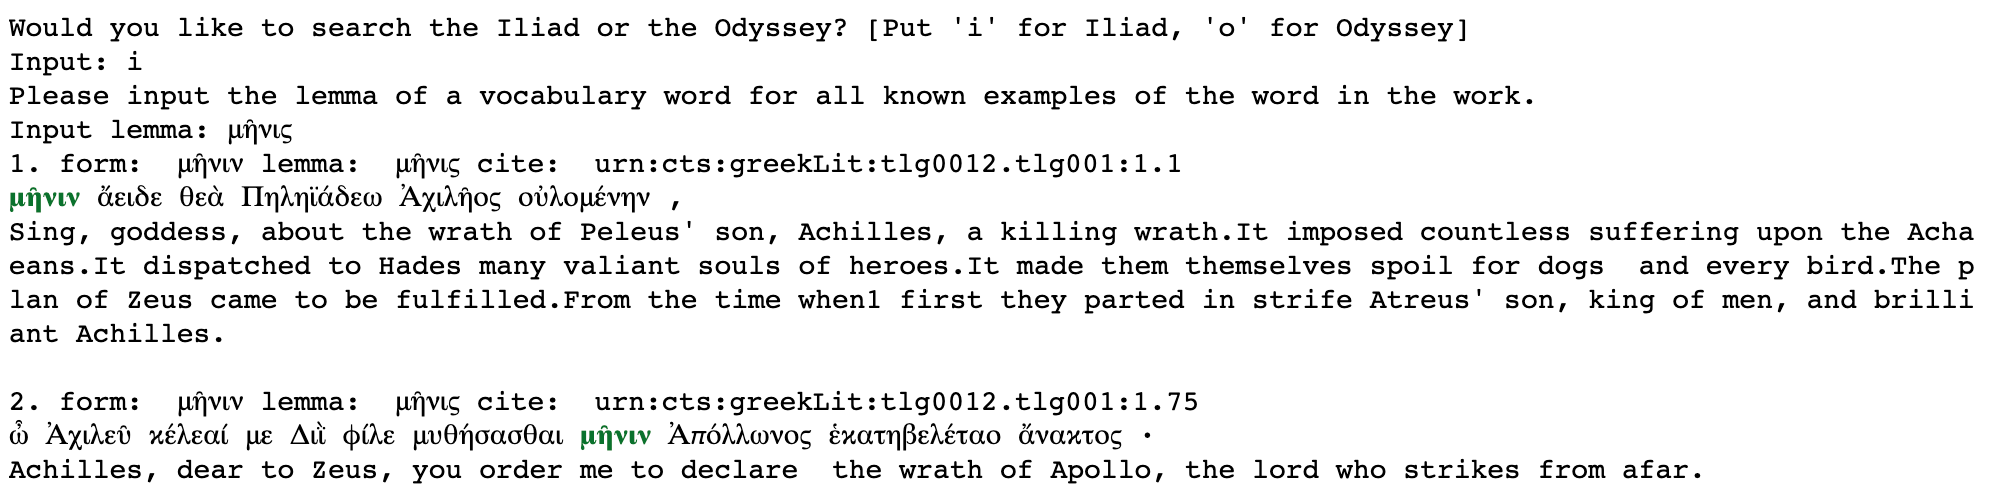

In [80]:
import xml.etree.ElementTree as ET
import os

ILIAD      = "tlg0012.tlg001.perseus-grc1.tb.xml"
ODYSSEY    = "tlg0012.tlg002.perseus-grc1.tb.xml"

print("Would you like to search the Iliad or the Odyssey? [Put 'i' for Iliad, 'o' for Odyssey]")

FILENAME = ''
while (FILENAME == ''):
    work = input("Input: ")
    if (work == 'i' or work == 'I' or work == '1' or work == 'Il' or work == 'Iliad'):
        FILENAME = ILIAD
        il_od = 'i'
    elif (work == 'o' or work == 'O' or work == '2' or work == 'Od' or work == "Odyssey"):
        FILENAME = ODYSSEY
        il_od = 'o'
    else:
        print("Your input cannot be recognized! Try ['i' for Iliad or 'o' for Odyssey].")

LOCALPATH  = os.path.join(LOCALROOT, 'gAGDT', 'data', 'xml', FILENAME)

tree = ET.parse(LOCALPATH)
root = tree.getroot()

count = 1

print("Please input the lemma of a vocabulary word for all known examples of the word in the work.")
vocab = input("Input lemma: ")

for sentence in root.findall('.//sentence'):
    subdoc = sentence.get('subdoc')
    sentid = sentence.get('id')
    for word in sentence.findall('./word'):
        wordid = word.get('id')
        form = word.get('form')
        lemma = word.get('lemma')
        cite = word.get('cite')
        if (vocab == lemma):
            print(str(count) + ".", "form: ", form, "lemma: ", lemma, "cite: ", cite)
            printGrkSent(il_od, sentid, wordid)
            print('')
            printEngSent(il_od, sentid)
            print('')
            print('')
            count += 1

Would you like to search the Iliad or the Odyssey? [Put 'i' for Iliad, 'o' for Odyssey]
Input: i
Please input the lemma of a vocabulary word for all known examples of the word in the work.
Input lemma: μῆνις
1. form:  μῆνιν lemma:  μῆνις cite:  urn:cts:greekLit:tlg0012.tlg001:1.1
μῆνιν ἄειδε θεὰ Πηληϊάδεω Ἀχιλῆος οὐλομένην , 
Sing, goddess, about the wrath of Peleus' son, Achilles, a killing wrath.It imposed countless suffering upon the Achaeans.It dispatched to Hades many valiant souls of heroes.It made them themselves spoil for dogs  and every bird.The plan of Zeus came to be fulfilled.From the time when1 first they parted in strife Atreus' son, king of men, and brilliant Achilles.

2. form:  μῆνιν lemma:  μῆνις cite:  urn:cts:greekLit:tlg0012.tlg001:1.75
ὦ Ἀχιλεῦ κέλεαί με Διῒ φίλε μυθήσασθαι μῆνιν Ἀπόλλωνος ἑκατηβελέταο ἄνακτος · 
Achilles, dear to Zeus, you order me to declare  the wrath of Apollo, the lord who strikes from afar.

3. form:  μῆνιν lemma:  μῆνις cite:  urn:cts:greek

## Adjacency List & Network Creation

### Preposition Modified Verbs

This program examines the relationship between prepositions (specifically ὑπό) and verbs. This script returns the frequencies of which verbs tend to depend on ὑπό the most in an exportable `pandas` dataframe.

`MODLEMMA`, `MODIFIER`, and `TARGET` can be changed as needed. 

Currently, `MODLEMMA` (modifier lemma) is set to "ὑπό", `MODIFIER` is set to "preposition", and `TARGET` is set to "verb".

Sample Output:

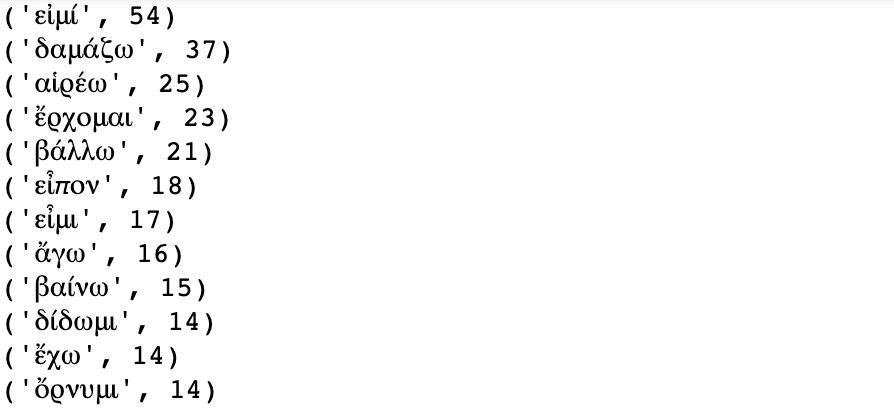

In [84]:
import xml.etree.ElementTree as ET
import pandas as pd

ILIAD = "tlg0012.tlg001.perseus-grc1.tb.xml"
ODYSSEY = "tlg0012.tlg001.perseus-grc1.tb.xml"
                                                           # change as needed 
LOCALPATH  = os.path.join(LOCALROOT, 'gAGDT', 'data', 'xml', ILIAD)

tree = ET.parse(LOCALPATH)
root = tree.getroot()

POS = {'noun': 'n','verb': 'v','participle': 't','adjective': 'a','adverb': 'd','article': 'l','particle': 'g',
       'conjunction': 'c','preposition': 'r','pronoun': 'p','numeral': 'm','interjection': 'i','exclamation': 'e',
       'punctuation': 'u','irregular': 'x'}

targid    = -10    #in case the code encounters a verb first
modhead   = -20    #in case the code encounters a prep first
targlemma = ''
moddict   = {}

# change as needed
MODLEMMA  = 'ὑπό'  
MODIFIER  = 'preposition'
TARGET    = 'verb'

for sentence in root.findall('.//sentence'):
    for word in sentence.findall('./word'):
        if 'postag' in word.attrib:
            postag = word.get('postag')
            pos = postag[0]

            if (pos == POS[MODIFIER]):
                modlem = word.get('lemma')
                if modlem == MODLEMMA:
                    modhead = word.get('head')
                    if targid == modhead:
                        objcount = moddict.get(targlemma)
                        if (objcount == None):
                            moddict.update({targlemma: 1})
                        else:
                            objcount += 1
                            moddict.update({targlemma: objcount})
            elif (pos == POS[TARGET]):
                targid    = word.get('id')
                targlemma = word.get('lemma')
                if targid == modhead:
                    objcount = moddict.get(targlemma)
                    if (objcount == None):
                        moddict.update({targlemma: 1})
                    else:
                        objcount += 1
                        moddict.update({targlemma: objcount})
    targid = -10    
    modhead = -20

sortedDict = sorted(moddict.items(), key=lambda x: x[1], reverse=True)
df = pd.DataFrame(sortedDict)
#df.to_csv('prepdeps.csv', index=False)

print(*sortedDict, sep = '\n')

('εἰμί', 54)
('δαμάζω', 37)
('αἱρέω', 25)
('ἔρχομαι', 23)
('βάλλω', 21)
('εἶπον', 18)
('εἶμι', 17)
('ἄγω', 16)
('βαίνω', 15)
('δίδωμι', 14)
('ἔχω', 14)
('ὄρνυμι', 14)
('φεύγω', 14)
('εἶδον', 13)
('λύω', 13)
('τίθημι', 13)
('γίγνομαι', 12)
('ἵστημι', 12)
('μάχομαι', 12)
('πείθω', 11)
('τίκτω', 11)
('λείπω', 10)
('πίπτω', 9)
('οἶδα', 8)
('φέρω', 8)
('προσαυδάω', 8)
('ἐλαύνω', 8)
('λαμβάνω', 7)
('μένω', 7)
('ὄλλυμι', 7)
('ἱκνέομαι', 6)
('κελεύω', 6)
('ἕπομαι', 6)
('τελέω', 6)
('ἵημι', 6)
('ἄρχω', 6)
('κεῖμαι', 6)
('ἐρύω1', 5)
('δέω', 5)
('νύσσω', 5)
('ἐξεναρίζω', 5)
('εὔχομαι', 5)
('τύπτω', 5)
('τείρω', 5)
('ἧμαι', 5)
('φημί', 5)
('ἄνωγα', 5)
('εἴκω1', 5)
('χωρέω', 5)
('χολόω', 5)
('καλύπτω', 5)
('ἀείρω', 5)
('πρόσφημι', 5)
('ἀνάσσω', 4)
('ἱκάνω', 4)
('πάσχω', 4)
('λάμπω', 4)
('οὐτάω', 4)
('τέμνω', 4)
('λίσσομαι', 4)
('ἔλπω', 4)
('φορέω', 4)
('κλονέω', 4)
('οἴχομαι', 4)
('φαίνω', 4)
('νικάω', 4)
('φοβέω', 4)
('μάρναμαι', 4)
('ἐθέλω', 4)
('ἀμείβω', 4)
('δείδω', 4)
('φωνέω', 4)
('ἀπόλλυμι',

### Prepositions with Accusative Objects

This program examines the relationship between prepositions (specifically ὑπό) and objects (specifically accusative). It returns the frequencies of which objects show up in relation to ὑπό in an exportable `pandas` dataframe. It also accounts for prepositions that have no dependent objects.

`TARGET`, `TARGLEMMA`, and `MODCASE` can be changed as needed. 

Currently, `TARGET` (modifier lemma) is set to "preposition", `TARGLEMMA` (target lemma) is set to "ὑπό", and `MODCASE` (modifier case) is set to "accusative".

Sample Output:

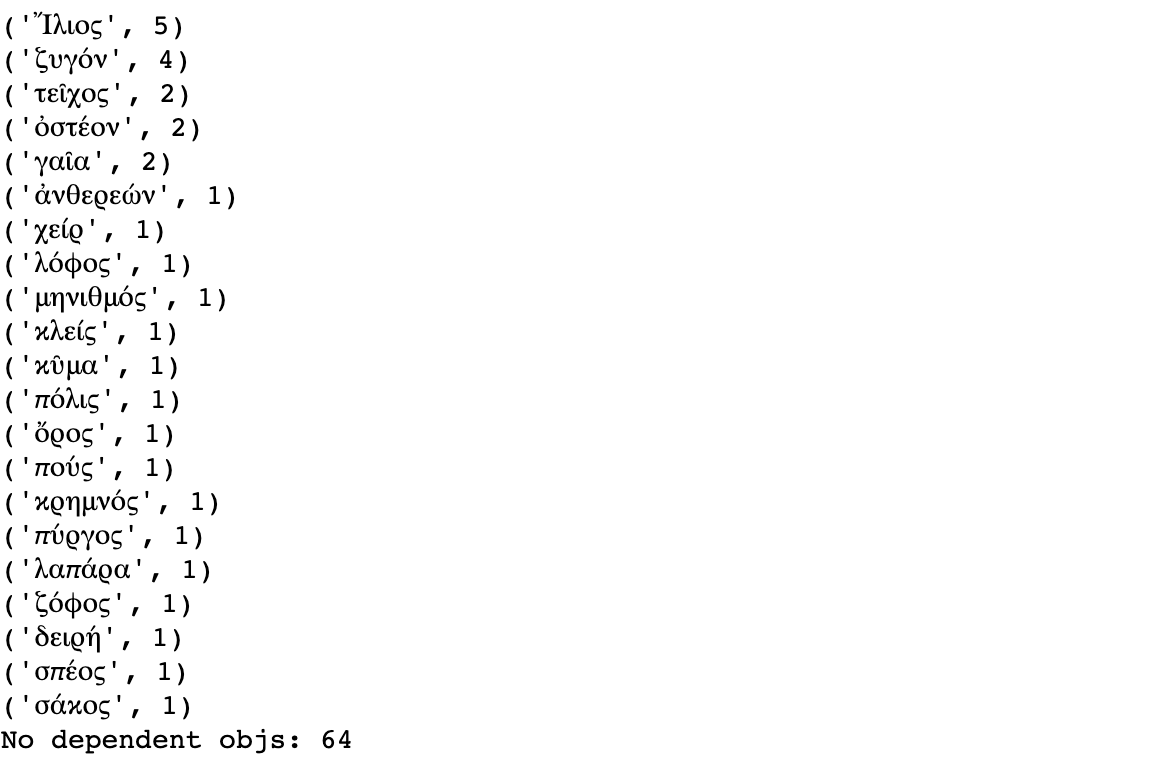

In [93]:
import xml.etree.ElementTree as ET
import pandas as pd

# change FILENAME to local path
ILIAD   = "tlg0012.tlg001.perseus-grc1.tb.xml"
ODYSSEY = "tlg0012.tlg001.perseus-grc1.tb.xml"
                                                           # change as needed 
LOCALPATH = os.path.join(LOCALROOT, 'gAGDT', 'data', 'xml', ILIAD)
tree      = ET.parse(LOCALPATH)
root      = tree.getroot()

POS   = {'noun': 'n','verb': 'v','participle': 't','adjective': 'a','adverb': 'd','article': 'l','particle': 'g',
         'conjunction': 'c','preposition': 'r','pronoun': 'p','numeral': 'm','interjection': 'i','exclamation': 'e',
         'punctuation': 'u','irregular': 'x'}

cases = {'nominative':'n', 'locative':'l','vocative':'v','genitive':'g','dative':'d',
         'accusative':'a','uncertain':'x'}

targid   = -10   # in case the code encounters a prep first
modhead  = -20   # in case the code encounters a noun first

# change as needed
TARGET = 'preposition'
TARGLEMMA = 'ὑπό'         
MODCASE = 'accusative'

targdict  = {}
modlemma  = ''
nodeps    = 0

for sentence in root.findall('.//sentence'):
    targcount = 0
    matchlist = []
    for word in sentence.findall('./word'):
        if 'postag' in word.attrib:
            postag = word.get('postag')
            pos    = postag[0]
            if (pos == POS[TARGET]):
                targlem = word.get('lemma')
                if targlem == TARGLEMMA:
                    targid = word.get('id')
                    targcount += 1

                    if targid == modhead:
                        matchlist.append('T')
                        if case == MODCASE:
                            targcount = targdict.get(targlem)
                            if (targcount == None):
                                targdict.update({modlemma: 1})
                            else:
                                targcount += 1
                                targdict.update({modlemma: modcount})
                            #print(word.attrib)
                            #print(count) #counts query results
                            #count+=1
                    else:
                        matchlist.append('F')
                #print(word.attrib)

            else: 
                modhead  = word.get('head')
                modlemma = word.get('lemma')
                case     = postag[7]
                if targid == modhead:
                    matchlist.append('T')
                    if case == cases[MODCASE]:
                        modcount = targdict.get(modlemma)
                        if (modcount == None):
                            targdict.update({modlemma: 1})
                        else:
                            modcount += 1
                            targdict.update({modlemma: modcount})
                else:
                    matchlist.append('F')

    numtargs = matchlist.count('T')
    if (numtargs != targcount):
        extra  = abs(numtargs - targcount)
        nodeps += extra
    targid  = -10
    modhead = -20

sortedDict = sorted(targdict.items(), key=lambda x: x[1], reverse=True)

df = pd.DataFrame(sortedDict)
#df.to_csv('prepobjs.csv', index=False)

print(*sortedDict, sep = '\n')
print("No dependent objs:", nodeps)

('Ἴλιος', 5)
('ζυγόν', 4)
('τεῖχος', 2)
('ὀστέον', 2)
('γαῖα', 2)
('ἀνθερεών', 1)
('χείρ', 1)
('λόφος', 1)
('μηνιθμός', 1)
('κλείς', 1)
('κῦμα', 1)
('πόλις', 1)
('ὄρος', 1)
('πούς', 1)
('κρημνός', 1)
('πύργος', 1)
('λαπάρα', 1)
('ζόφος', 1)
('δειρή', 1)
('σπέος', 1)
('σάκος', 1)
No dependent objs: 64


### Preposition Relation Network

Using the `networkx` package, I created a directed weighted graph representing how prepositions are related to other words in sentences. This network is represented using an adjacency list, which is converted to a `pandas` dataframe to simplify exporting.

Sample Output:

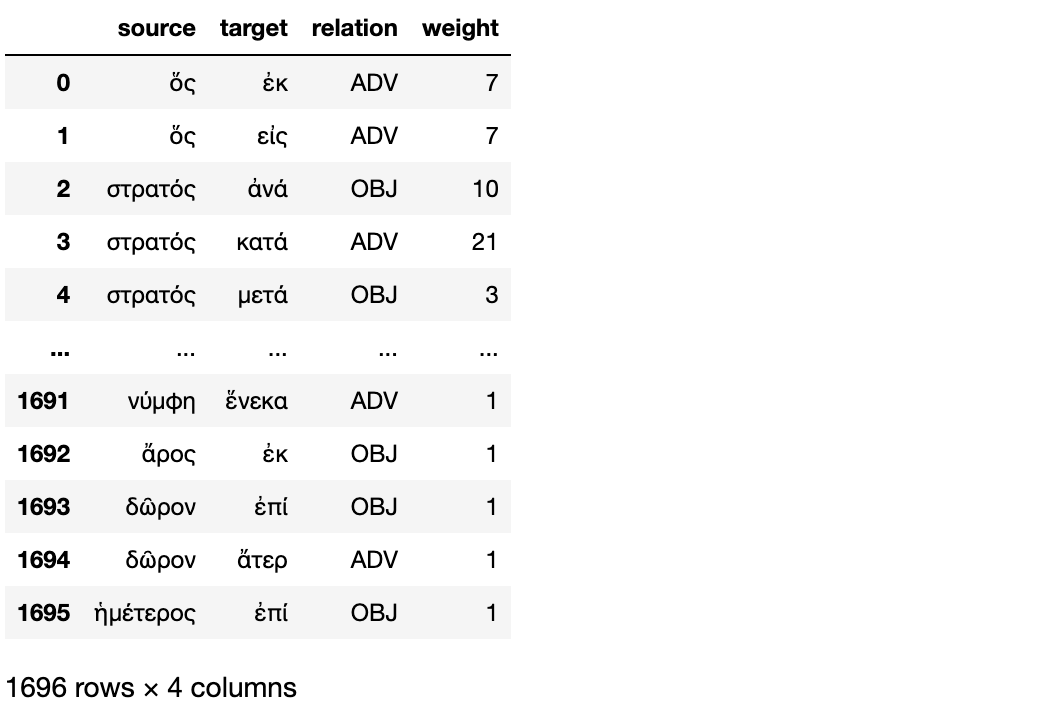

In [110]:
import xml.etree.ElementTree as ET
import networkx as nx

# change FILENAME to local path
ILIAD   = "tlg0012.tlg001.perseus-grc1.tb.xml"
ODYSSEY = "tlg0012.tlg001.perseus-grc1.tb.xml"

LOCALPATH  = os.path.join(LOCALROOT, 'gAGDT', 'data', 'xml', ILIAD)
tree = ET.parse(LOCALPATH)
root = tree.getroot()

POS   = {'noun': 'n','verb': 'v','participle': 't','adjective': 'a','adverb': 'd','article': 'l','particle': 'g',
         'conjunction': 'c','preposition': 'r','pronoun': 'p','numeral': 'm','interjection': 'i','exclamation': 'e',
         'punctuation': 'u','irregular': 'x'}

G = nx.DiGraph()

prepid     = -10
preplemma  = -20
attribhead = -30

for sentence in root.findall(".//sentence"):
    for word in sentence.findall("./word"):
        if ('postag' in word.attrib):
            postag = word.get('postag')
            pos = postag[0]
            if (pos == POS['preposition']):
                prepid    = word.get('id')
                preplemma = word.get('lemma')
                G.add_node(preplemma, pos = pos)
            else:
                attribrelation = word.get('relation')
                attribhead = word.get('head')
                attriblemma = word.get('lemma')
                if (attribhead == prepid):
                    G.add_node(attriblemma, lemma = attriblemma, pos = pos, connectedWith = preplemma)
                    if G.has_edge(attriblemma, preplemma):
                        G[attriblemma][preplemma]['weight'] += 1
                    else:
                        G.add_edge(attriblemma, preplemma, relation = attribrelation, weight = 1)
    prepid     = -10
    preplemma  = -20
    attribhead = -30

df = nx.to_pandas_edgelist(G)
df
#nx.write_graphml(G, "prepRelationNetwork.graphml")

,source,target,relation,weight
0,ὅς,ἐκ,ADV,7
1,ὅς,εἰς,ADV,7
2,στρατός,ἀνά,OBJ,10
3,στρατός,κατά,ADV,21
4,στρατός,μετά,OBJ,3
...,...,...,...,...
1691,νύμφη,ἕνεκα,ADV,1
1692,ἄρος,ἐκ,OBJ,1
1693,δῶρον,ἐπί,OBJ,1
1694,δῶρον,ἄτερ,ADV,1
